# CUSTOMER SEGMENTATION

### The aim is to group customers based on purchasing behavior for tasks like marketing or personalization.
### I will be conducting an RFM analysis
### R - Recency - How recent a customer made a pruchase
### F - Frequency - How often a customer makes purchases
### M - Monetary - How much a customer spends

In [1]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from datetime import datetime
import joblib

In [2]:
# Creating dataframe from first dataset

df1 = pd.read_excel("online_retail.xlsx")
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
# Creating dataframe from second dataset

df2 = pd.read_excel("online_retail_II.xlsx")
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df2.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


#### Both dataframes share the same features, datatypes of features are similar as well however there are 3 feature names that are not uniform in both dataframes i.e., `InvoiceNo` as `Invoice`, `UnitPrice` as `Price` and `CustomerID` as `Customer ID` in df1 and df2 respectively

### Renaming features/column names

In [8]:
# Renaming column names in df2

df2.rename(columns={
    "Invoice":"InvoiceNo",
    "Price":"UnitPrice",
    "Customer ID":"CustomerID"
}, inplace=True)

In [9]:
# Checking to see if column names have changed

df2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
# Concantenate the two dataframes into one dataframe

df = pd.concat([df1,df2], ignore_index=True)
df.shape

(1067370, 8)

In [11]:
# Checking for missing values

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     243007
Country             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067370 entries, 0 to 1067369
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   InvoiceNo    1067370 non-null  object        
 1   StockCode    1067370 non-null  object        
 2   Description  1062988 non-null  object        
 3   Quantity     1067370 non-null  int64         
 4   InvoiceDate  1067370 non-null  datetime64[ns]
 5   UnitPrice    1067370 non-null  float64       
 6   CustomerID   824363 non-null   float64       
 7   Country      1067370 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [13]:
null_df = df[df["CustomerID"].isna() == True]
null_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [14]:
unique_years = df['InvoiceDate'].dt.year.unique()
print(sorted(unique_years))

[2009, 2010, 2011]


## Data Cleaning

### Handle Missing Values:

#### -> CustomerID has missing values, which are essential for customer-based segmentation. I'll drop rows where CustomerID is missing.
#### -> Description also has missing values but its not critical for segmentation and can be ignored for now.

### Remove Negative Quantities:

#### -> Negative quantities likely indicate returns. We'll remove them for now.

### Create New Features:

#### -> Total revenue per row: TotalPrice = Quantity * UnitPrice

### Dropping Columns based on Domain knowledge

#### -> The Description column does not provide customer-level behavior insights directly relevant for segmentation.

In [15]:
# Checking for True Duplicates

len(df[df.duplicated(keep=False)])

67242

In [16]:
def wrangle(df):
    # 1. Sort by InvoiceDate
    df = df.sort_values("InvoiceDate").reset_index(drop=True)

    # 2. Drop rows with null values in CustomerID
    df = df.dropna(subset=["CustomerID"])

    # 3. Remove negative quantities
    df = df[df["Quantity"] > 0]

    # 4. Convert CustomerID to int for clarity
    df["CustomerID"] = df["CustomerID"].astype(int)

    # 5. Create a new feature for total revenue per row
    df["TotalPrice"] = df["UnitPrice"] * df["Quantity"]

    # 6. Drop the Description column
    df = df.drop(columns=["Description"])

    # 7. Remove duplicate rows
    df = df.drop_duplicates()

    return df


In [17]:
df = wrangle(df)
df.isna().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779492 entries, 0 to 1067369
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    779492 non-null  object        
 1   StockCode    779492 non-null  object        
 2   Quantity     779492 non-null  int64         
 3   InvoiceDate  779492 non-null  datetime64[ns]
 4   UnitPrice    779492 non-null  float64       
 5   CustomerID   779492 non-null  int64         
 6   Country      779492 non-null  object        
 7   TotalPrice   779492 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 53.5+ MB


In [19]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


### Group Transactions By Customer

In [20]:
customer_data = df.groupby("CustomerID").agg({
    'InvoiceNo':'nunique', # Frequency: number of transactions
    'TotalPrice':'sum',    # Monetary: total money spent
    'InvoiceDate':'max'    # Recency: Last Purchase Date
}).reset_index()

customer_data.rename(columns={
    'InvoiceNo':'Frequency',
    'TotalPrice':'Monetary',
    'InvoiceDate':'LastPurchaseDate'
}, inplace=True)

customer_data.head()

,CustomerID,Frequency,Monetary,LastPurchaseDate
0,12346,12,77556.46,2011-01-18 10:01:00
1,12347,8,4921.53,2011-12-07 15:52:00
2,12348,5,2019.40,2011-09-25 13:13:00
3,12349,4,4428.69,2011-11-21 09:51:00
4,12350,1,334.40,2011-02-02 16:01:00


## Exploratory Data Analysis (EDA)

### 1. Frequency of Transactions

/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


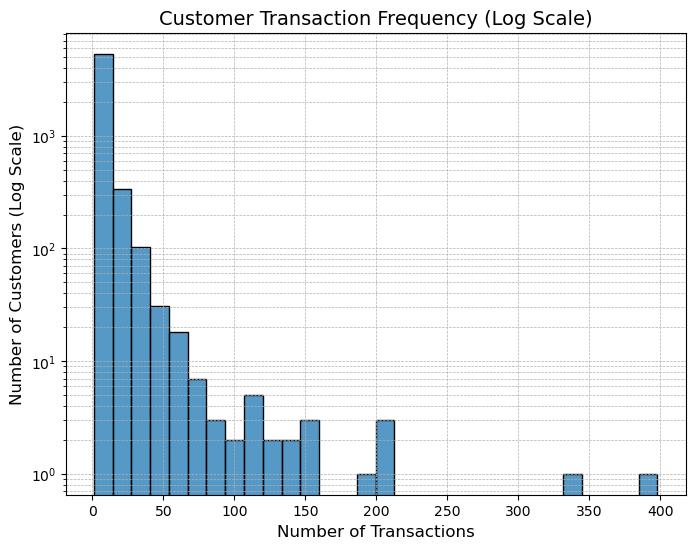

In [21]:
sns.histplot(customer_data['Frequency'], kde=False, bins=30)
plt.yscale('log')  # Apply log scale to the y-axis

plt.title('Customer Transaction Frequency (Log Scale)', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Number of Customers (Log Scale)', fontsize=12)

# Adding grid for readability
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

# Adjust figure size for reports
plt.gcf().set_size_inches(8, 6)

plt.show();


### 2. Monetary Distribution:

/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


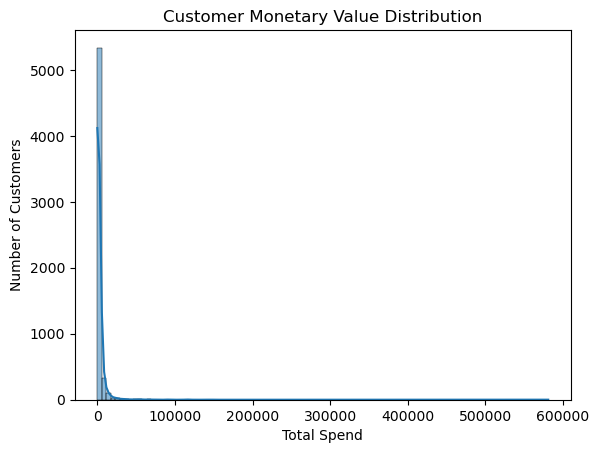

In [22]:
sns.histplot(customer_data['Monetary'], kde=True, bins=100)
plt.title('Customer Monetary Value Distribution')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show();

### 3. Recency Analysis:

/home/muruthi/anaconda3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


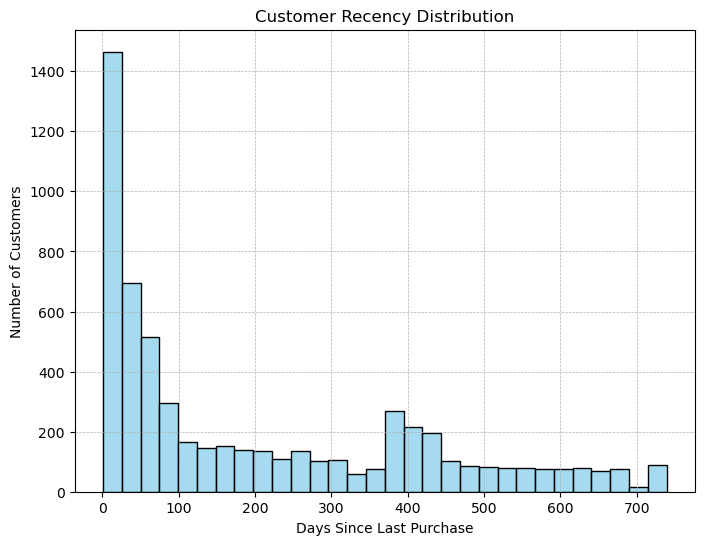

In [23]:
most_recent_date = customer_data['LastPurchaseDate'].max() + pd.Timedelta(days=1)

# 1. Define the most recent date in the dataset as the reference point
customer_data['LastPurchaseDate'] = pd.to_datetime(customer_data['LastPurchaseDate'])

# 2. Calculate recency for each customer
customer_data['Recency'] = (most_recent_date - customer_data['LastPurchaseDate']).dt.days

# 3. Plot the recency distribution
sns.histplot(customer_data['Recency'], kde=False, bins=30, color='skyblue')
plt.title('Customer Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.grid(visible=True, which="both", linestyle='--', linewidth=0.5)
plt.gcf().set_size_inches(8, 6)
plt.show()